In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')

## **Read Dataset**

In [2]:
df=pd.read_csv("D:\\Bassma wahba\\Session 18-20240420T135230Z-001\\Session 18\\Dataset\\Online Group\\songs.csv")
df

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080
4,5,1963,Please Please Me,Boys,0.402,0.86,0.0504,0.6070,0.7360,0.822,146440
...,...,...,...,...,...,...,...,...,...,...,...
188,189,1970,Let It Be,ive got a feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560
189,190,1970,Let It Be,one after 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960
190,191,1970,Let It Be,the long and winding road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187
191,192,1970,Let It Be,for you blue,0.880,0.556,0.0855,0.2400,0.2400,0.955,152213


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            193 non-null    int64  
 1   year          193 non-null    int64  
 2   album         193 non-null    object 
 3   song          193 non-null    object 
 4   danceability  193 non-null    float64
 5   energy        193 non-null    object 
 6   speechiness   193 non-null    float64
 7   acousticness  193 non-null    float64
 8   liveness      193 non-null    float64
 9   valence       193 non-null    float64
 10  duration_ms   193 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 16.7+ KB


In [4]:
df['energy']=df['energy'].str.replace(')','').astype('float64')

In [5]:
df.dtypes

id                int64
year              int64
album            object
song             object
danceability    float64
energy          float64
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
duration_ms       int64
dtype: object

## **Exploration Data Analysis**

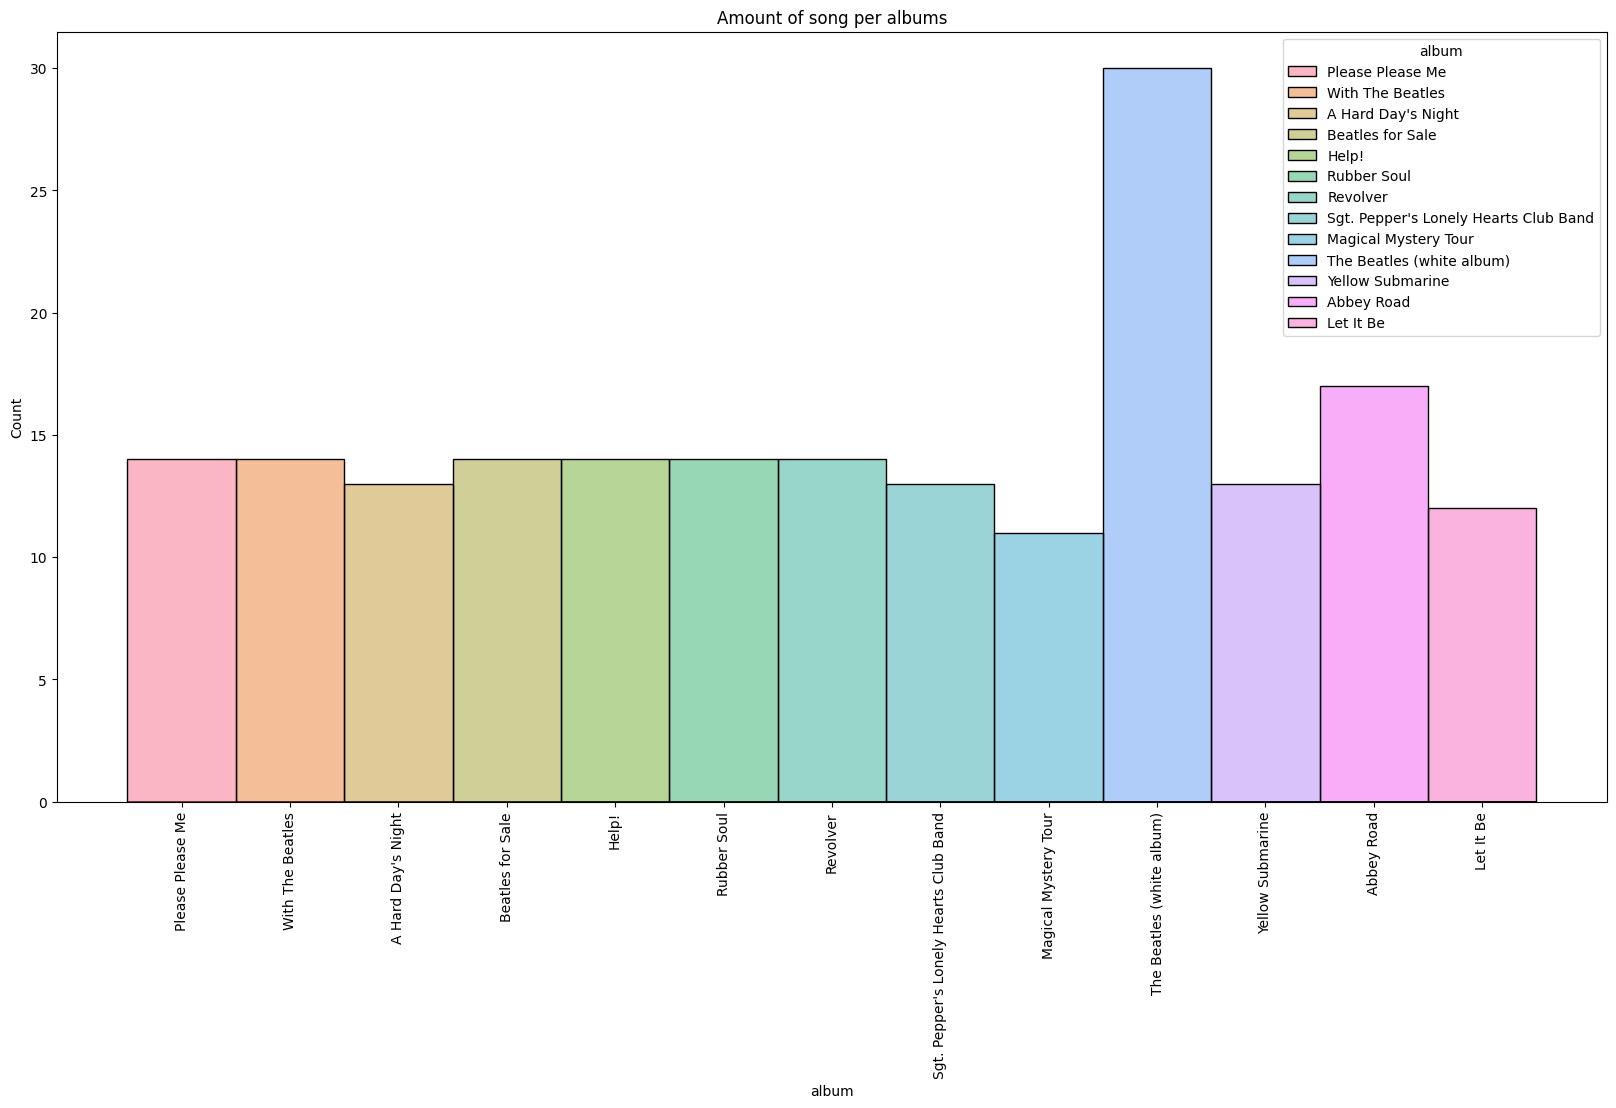

In [6]:
plt.figure(figsize=(20,10))
sns.histplot(x=df['album'],hue=df['album'],legend=True)
plt.title('Amount of song per albums')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Elbow method for two features
scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df[['acousticness','valence']])
    scores.append(kmeans.inertia_)

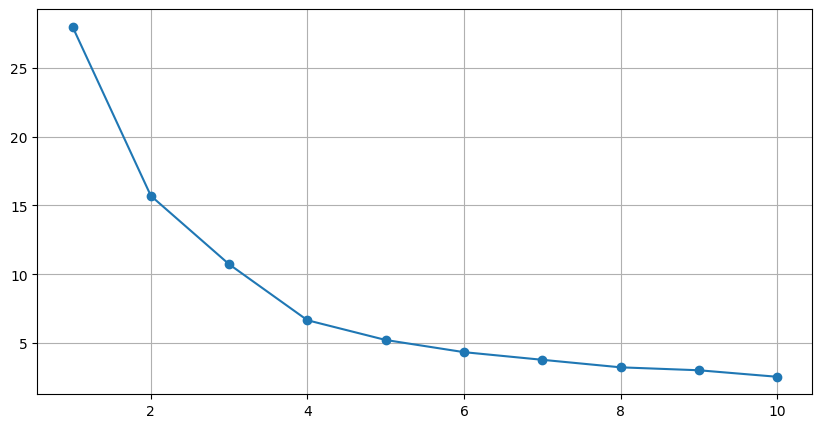

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),scores,marker='o')
plt.grid()
plt.show()

In [11]:
#silhouette for two feature
silhouette_scores=[]

for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df[['acousticness','valence']])
    score=silhouette_score(df[['acousticness','valence']],kmeans.labels_)
    silhouette_scores.append(score)

In [12]:
silhouette_scores

[0.4124346088352222,
 0.40707542540667185,
 0.4268407003454385,
 0.4035395062957109,
 0.40607787592581157,
 0.3779777530074053,
 0.4092966878039883,
 0.388240596301519,
 0.39040906495970296]

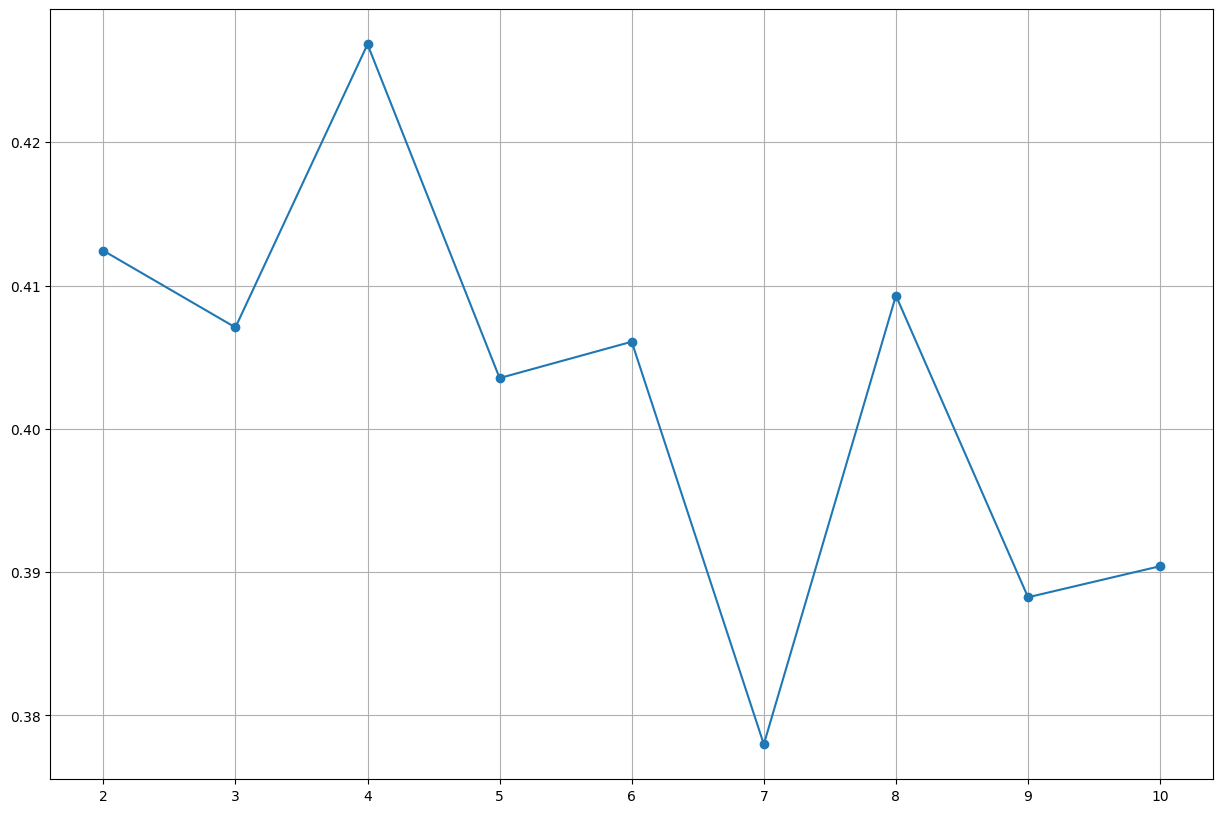

In [13]:
plt.figure(figsize=(15,10))
plt.plot(range(2,11),silhouette_scores,marker='o')
plt.grid()
plt.show()

In [14]:
# Fit & predict model
kmeans_model=KMeans(n_clusters=4,random_state=42)
df['Cluster']=kmeans_model.fit_predict(df[['acousticness','valence']])


In [15]:
df

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,Cluster
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947,2
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547,1
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133,1
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080,1
4,5,1963,Please Please Me,Boys,0.402,0.860,0.0504,0.6070,0.7360,0.822,146440,1
...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,1970,Let It Be,ive got a feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560,0
189,190,1970,Let It Be,one after 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960,2
190,191,1970,Let It Be,the long and winding road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187,3
191,192,1970,Let It Be,for you blue,0.880,0.556,0.0855,0.2400,0.2400,0.955,152213,2


In [16]:
df['Cluster'].value_counts()

Cluster
2    80
1    54
0    34
3    25
Name: count, dtype: int64

In [17]:
px.scatter(df,x='acousticness',y='valence',color='Cluster',hover_data=['album','year','song'])

In [18]:
# Elbow method for three features
scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df[['acousticness','valence','liveness']])
    scores.append(kmeans.inertia_)

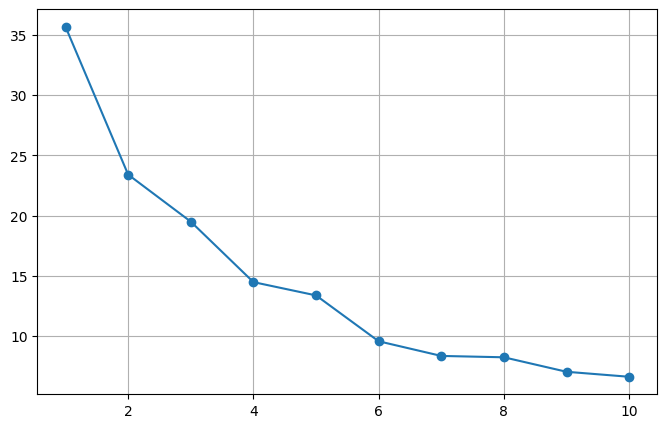

In [19]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),scores,marker='o')
plt.grid()
plt.show()

In [20]:
# silhouette method for three features
silhouette_scores=[]

for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df[['acousticness','valence','liveness']])
    score=silhouette_score(df[['acousticness','valence','liveness']],kmeans.labels_)
    silhouette_scores.append(score)

In [21]:
silhouette_scores

[0.3353017443035294,
 0.27459200689686186,
 0.32200774740245486,
 0.304891216196354,
 0.3532306233584599,
 0.3343158713431319,
 0.2950297220876352,
 0.3189123431497349,
 0.31094344715012645]

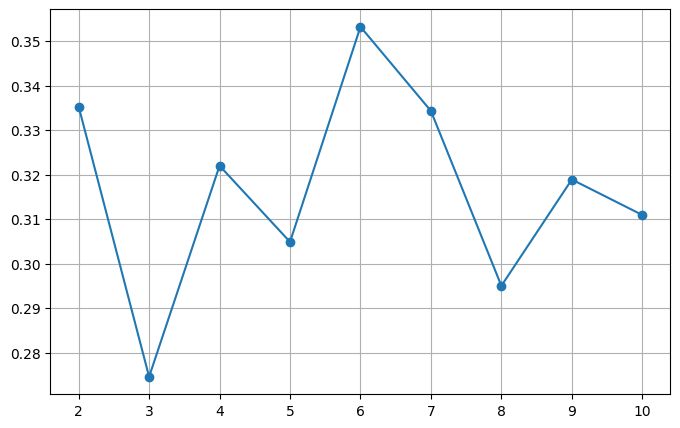

In [22]:
plt.figure(figsize=(8,5))
plt.plot(range(2,11),silhouette_scores,marker='o')
plt.grid()
plt.show()

In [40]:
# Fit & predict model
kmeans_model=KMeans(n_clusters=5)
df['Cluster2']=kmeans_model.fit_predict(df[['acousticness','valence','liveness']])


In [41]:
df

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,Cluster,Cluster2
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947,2,1
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547,1,3
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133,1,3
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080,1,3
4,5,1963,Please Please Me,Boys,0.402,0.860,0.0504,0.6070,0.7360,0.822,146440,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,1970,Let It Be,ive got a feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560,0,0
189,190,1970,Let It Be,one after 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960,2,0
190,191,1970,Let It Be,the long and winding road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187,3,2
191,192,1970,Let It Be,for you blue,0.880,0.556,0.0855,0.2400,0.2400,0.955,152213,2,1


In [42]:
px.scatter_3d(df,x='acousticness',y='valence',z='liveness',color='Cluster2',hover_data=['song','album','year'])

## **Recommendation System**

In [43]:
song=[]
for i in df['song']:
    song.append(i)

In [44]:
song

['I Saw Her Standing There',
 'Misery',
 'Anna',
 'Chains',
 'Boys',
 'Ask Me Why',
 'Please Please Me',
 'Love Me Do',
 'P.S. I Love You',
 "Baby It's You",
 'Do You Want to Know a Secret',
 'Taste of Honey',
 "There's a Place",
 'Twist and Shout',
 'It Wont Be Long',
 "All I've Got To Do",
 'All My Loving',
 'Don’t Bother Me',
 'Little Child',
 'Till There Was You',
 'Please Mister Postman',
 'Roll Over Beethoven',
 'Hold Me Tight',
 'You Really Got A Hold On Me',
 'I Wanna Be Your Man',
 'Devil In Her Heart',
 'Not A Second Time',
 'Money(That’s What I Want)',
 "A Hard Day's Night",
 'I should Have Known Better',
 'If I Fell',
 'Im Happy Just To Dance With You',
 'And I Love Her',
 'tell me why ',
 'cant buy me love',
 'any time at all',
 'ill cry instead',
 'things we said today',
 'when I get home',
 'you cant do that',
 'ill be back',
 'no reply',
 'im a loser',
 'babys in black',
 'rock and roll music',
 'ill follow the sun',
 'mr.moonlight',
 'kansas city/ Hey-Hey-Hey-Hey',
 'e

In [61]:
def song_recommendation(name,df):
    recommend=[]
    a=np.array(df.loc[df['song']==name][['acousticness','valence','liveness']]).flatten()
    for num in df['id']:
        b=np.array(df.loc[df['id']==num][['acousticness','valence','liveness']]).flatten()
        c=distance.euclidean(a,b)
        recommend.append([df.loc[df['id']==num]['song'],c])
        recommend.sort(key=lambda x:x[1])
    return recommend[1]

In [63]:
song_recommendation('Ask Me Why',df)

[46    mr.moonlight
 Name: song, dtype: object,
 0.03686041236882737]